# *Aufgabe: SVM und Interpretation ML*

0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import time
import shap
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Aufgabe 1. SVM

1. Load and split the data

In [2]:
data = pd.read_csv("../../../data/mpg.csv")
X  = data.drop(["mpg"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, data["mpg"])

minmax = MinMaxScaler()

x_train = pd.DataFrame(minmax.fit_transform(x_train), columns=X.columns)
x_test = minmax.fit_transform(x_test)

print('X Train: {}'.format(x_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(x_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (298, 7)
Y Train: (298,)
X Test: (100, 7)
Y Test: (100,)


In [3]:
# An alternative data
features, target = load_diabetes(return_X_y=True, as_frame=True)

X = features
x_train, x_test, y_train, y_test = train_test_split(features, target)

minmax = MinMaxScaler()

x_train = pd.DataFrame(minmax.fit_transform(x_train), columns=X.columns)
x_test = minmax.fit_transform(x_test)
print('X Train: {}'.format(x_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(x_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (331, 10)
Y Train: (331,)
X Test: (111, 10)
Y Test: (111,)


2. Train and evaluate all the models

In [4]:
import warnings
warnings.filterwarnings('ignore')

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def train_evaluate_time(method):
    start_time = time.time()
    methods[method].fit(x_train, y_train)
    running_time = round(time.time() - start_time,2)
    model_predict = methods[method].predict(x_test)
    model_mse = mse(model_predict,y_test)
    print("Genauigkeit von {}: {}; running time: {}".format(method, model_mse, running_time))


methods = {"knn": KNeighborsRegressor(), "linregr": LinearRegression(), "tree": DecisionTreeRegressor(), 
           "forest": RandomForestRegressor(), "ada": AdaBoostRegressor(), "svm": svm.SVR()}


for method in methods:
    train_evaluate_time(method)
    

Genauigkeit von knn: 3730.5088288288293; running time: 0.0
Genauigkeit von linregr: 3542.1993892093046; running time: 0.0
Genauigkeit von tree: 5897.4324324324325; running time: 0.0
Genauigkeit von forest: 3561.5741594594597; running time: 0.16
Genauigkeit von ada: 3524.096313864107; running time: 0.06
Genauigkeit von svm: 5177.462573819533; running time: 0.0


### Aufgabe 2. Interpretation

Using 331 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/331 [00:00<?, ?it/s]

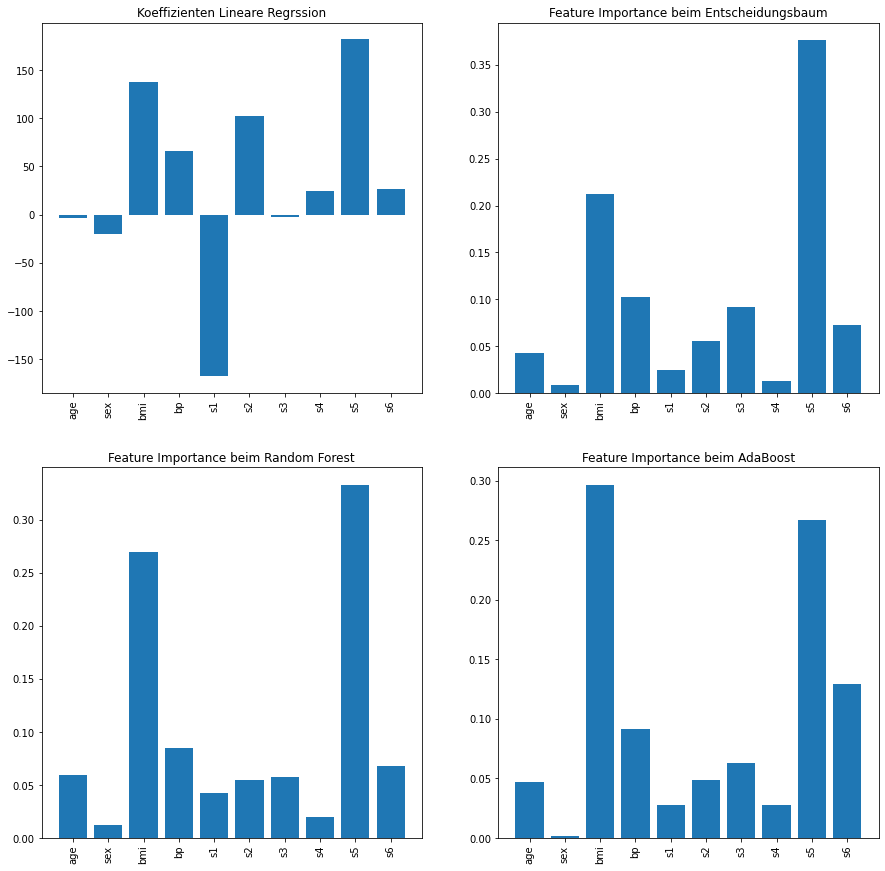

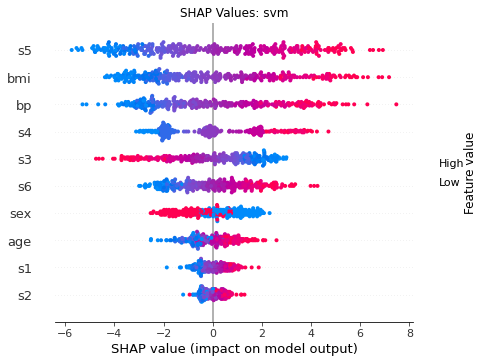

In [5]:
def plot_one_method(ax, title, x):
    ax.set_title(title)
    ticks = np.arange(1, len(x) + 1)
    ax.bar(ticks, x)
    ax.set_xticks(ticks=ticks, labels=list(x_train.columns), rotation=90)


fig, ax = plt.subplots(2,2, figsize=(15,15))

plot_one_method(ax[0,0], "Koeffizienten Lineare Regrssion", methods["linregr"].coef_)
plot_one_method(ax[0,1], "Feature Importance beim Entscheidungsbaum", methods["tree"].feature_importances_)
plot_one_method(ax[1,0], "Feature Importance beim Random Forest", methods["forest"].feature_importances_)
plot_one_method(ax[1,1], "Feature Importance beim AdaBoost", methods["ada"].feature_importances_)

# Shap value nehmen
#x_train=x_train.head(10)
explainer = shap.KernelExplainer(methods["svm"].predict, x_train)
shap_values = explainer.shap_values(x_train)
plt.figure(figsize=(10,10))
plt.title("SHAP Values: {}".format(method))
shap.summary_plot(shap_values, x_train)
plt.show()